In [2]:
import numpy as np
import scipy.stats as sps
from sklearn import model_selection, datasets, metrics, neighbors 

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

#### Генерация выборки

In [61]:
(samples, classes) = datasets.make_classification(n_samples=400, n_features=2, n_informative=2, 
                                                      n_classes=3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=2)

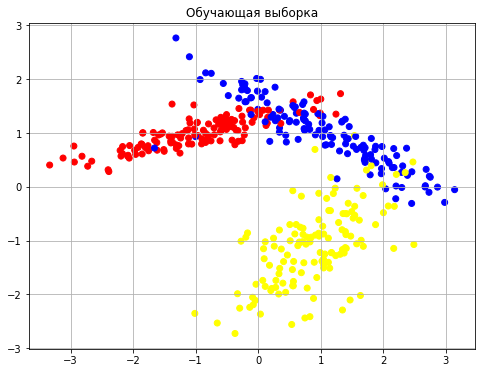

In [62]:
colors = ListedColormap(['red', 'blue', 'yellow'])
plt.figure(figsize=(8, 6))
plt.scatter(np.transpose(samples)[0], np.transpose(samples)[1], c=classes, cmap=colors)
plt.title(u'Обучающая выборка')
plt.grid()

#### Разделяющая поверхность для разных k

In [63]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [64]:
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

In [75]:
def plot_decision_surface(estimator, train_data, train_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot tecision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 40, cmap = colors)
    plt.title('Train data, accuracy={:.3f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))

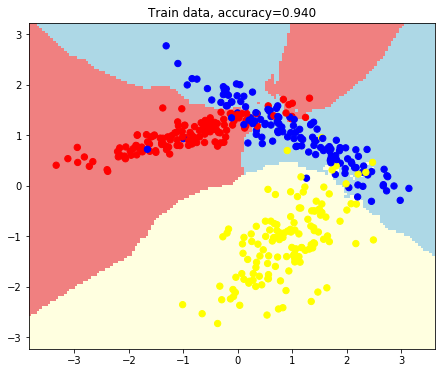

In [76]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, samples, classes)

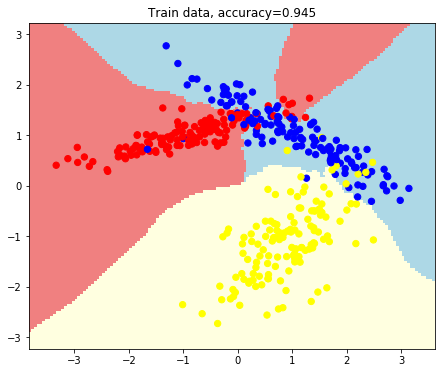

In [77]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, samples, classes)

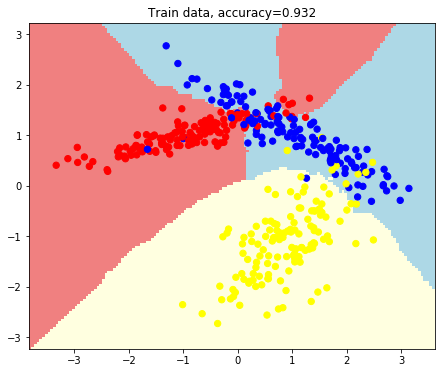

In [78]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, samples, classes)

#### 5-fold cross validation

In [70]:
k_array = np.arange(1, 300)
acc = [np.mean(model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=k),
                                               samples, classes, cv=5)) for k in k_array]

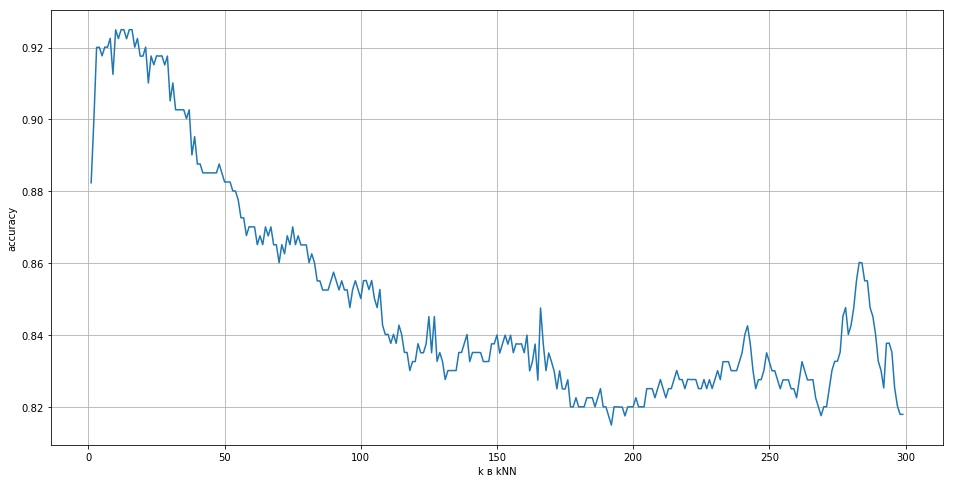

In [71]:
plt.figure(figsize=(16, 8))
plt.plot(k_array, acc)
plt.xlabel(u"k в kNN")
plt.ylabel("accuracy")
plt.grid()
plt.show()

#### Оптимальное k:

In [72]:
np.argmax(acc)

11